In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

In [2]:
df = pd.read_csv('titanic_df.csv')
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [3]:
df = prepare.prep_titanic(df)
df.head()

,Unnamed: 0,passenger_id,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third
0,0,0,0,male,22.0,1,0,7.2500,Third,Southampton,0,1,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0
2,2,2,1,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1,0,1
3,3,3,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,1,0,0
4,4,4,0,male,35.0,0,0,8.0500,Third,Southampton,1,1,0,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               891 non-null    int64  
 1   passenger_id             891 non-null    int64  
 2   survived                 891 non-null    int64  
 3   sex                      891 non-null    object 
 4   age                      714 non-null    float64
 5   sibsp                    891 non-null    int64  
 6   parch                    891 non-null    int64  
 7   fare                     891 non-null    float64
 8   class                    891 non-null    object 
 9   embark_town              889 non-null    object 
 10  alone                    891 non-null    int64  
 11  sex_male                 891 non-null    uint8  
 12  embark_town_Queenstown   891 non-null    uint8  
 13  embark_town_Southampton  891 non-null    uint8  
 14  class_Second             8

In [5]:
df.age = df.age.fillna(df.age.mean())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               891 non-null    int64  
 1   passenger_id             891 non-null    int64  
 2   survived                 891 non-null    int64  
 3   sex                      891 non-null    object 
 4   age                      891 non-null    float64
 5   sibsp                    891 non-null    int64  
 6   parch                    891 non-null    int64  
 7   fare                     891 non-null    float64
 8   class                    891 non-null    object 
 9   embark_town              889 non-null    object 
 10  alone                    891 non-null    int64  
 11  sex_male                 891 non-null    uint8  
 12  embark_town_Queenstown   891 non-null    uint8  
 13  embark_town_Southampton  891 non-null    uint8  
 14  class_Second             8

In [7]:
df = df.drop(columns = ['passenger_id', 'Unnamed: 0', 'class'])

In [8]:
df.head(3)

,survived,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third
0,0,male,22.0,1,0,7.2500,Southampton,0,1,0,1,0,1
1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0,0,0
2,1,female,26.0,0,0,7.9250,Southampton,1,0,0,1,0,1


In [9]:
train, validate, test = prepare.split(df, stratify_by = 'survived')

In [21]:
x_train = train.drop(columns = ['survived', 'sex', 'embark_town'])
y_train = train.survived

x_validate = validate.drop(columns = ['survived', 'sex', 'embark_town'])
y_validate = validate.survived

x_test = test.drop(columns = ['survived', 'sex', 'embark_town'])
y_test = test.survived

In [22]:
x_train.head(3)

,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third
583,36.0,0,0,40.1250,1,1,0,0,0,0
165,9.0,0,2,20.5250,0,1,0,1,0,1
50,7.0,4,1,39.6875,0,1,0,1,0,1


In [14]:
y_train

583    0
165    1
50     0
259    1
306    1
      ..
313    0
636    0
222    0
485    0
744    1
Name: survived, Length: 498, dtype: int64

# 1. What is your baseline prediction? What is your baseline accuracy? 

remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [15]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [17]:
baseline = y_train.mode()

baseline_prediction = (y_train == 0)

baseline_accuracy = baseline_prediction.mean()

print(f'Baseline accuracy: {round(baseline_accuracy, 2)}')

Baseline accuracy: 0.62


# 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [23]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth = 3, random_state = 123)

# Fit the model (only on Train)
tree1 = tree1.fit(x_train, y_train)

# Use the model
y_predictions = tree1.predict(x_train)

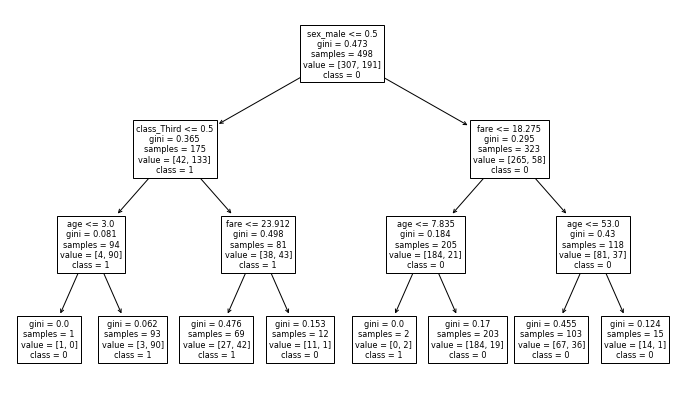

In [25]:
plt.figure(figsize = (12, 7))
plot_tree(tree1, feature_names = x_train.columns, class_names = ['0', '1'])
plt.show()

# 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [26]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
    .format(tree1.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


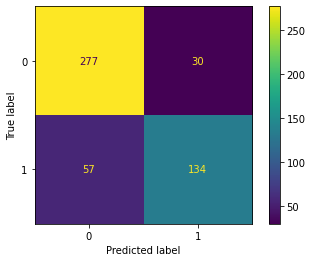

In [28]:
plot_confusion_matrix(tree1, x_train, y_train)

In [29]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [30]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict = True)
print('Tree of 1 depth')
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.829341,0.817073,0.825301,0.823207,0.824636
recall,0.902280,0.701571,0.825301,0.801925,0.825301
f1-score,0.864275,0.754930,0.825301,0.809602,0.822337
support,307.000000,191.000000,0.825301,498.000000,498.000000


# 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [31]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
# The label of positive and negative is arbitrary. What is sklearn considering to be the positive case here?

In [32]:
TN, FP, FN, TP

(277, 30, 57, 134)

In [33]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f'Negative Cases: {negative_cases}')
print(f'Positive Cases: {positive_cases}')
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


sklearn is calling survival (1) our positive case

In [37]:
ALL = TP + FP + TN + FN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP+FN
support_neg = FP+TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8253012048192772 

True Positive Rate/Sensitivity/Recall/Power: 0.7015706806282722 

False Positive Rate/False Alarm Ratio/Fall-out: 0.09771986970684039 

True Negative Rate/Specificity/Selectivity: 0.9022801302931596 

False Negative Rate/Miss Rate: 0.29842931937172773 

Precision/PPV: 0.8170731707317073 

F1 Score: 0.7549295774647887 

Support (0): 307 

Support (1): 191


# 5. Run through steps 2-4 using a different max_depth value.

AKA find the optimal max_depth

In [43]:
for i in range(1, 21):
    tree = DecisionTreeClassifier(max_depth = i, random_state = 123)
    
    tree = tree.fit(x_train, y_train)
    
    y_predictions = tree.predict(x_train)
    
    report = classification_report(y_train, y_predictions, output_dict = True)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     

# 6. Which model performs better on your in-sample data?

Max depth of 15+ produces the highest accuracy

# 7. Which model performs best on your out-of-sample data, the validate set?

In [44]:
metrics = []

for i in range(1, 25):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    
    tree = tree.fit(x_train, y_train)
    
    in_sample_accuracy = tree.score(x_train, y_train)
    
    out_of_sample_acuracy = tree.score(x_validate, y_validate)
    
    output = {
        'max_depth': i,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_of_sample_acuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
4,5,0.853414,0.803738,0.049675
5,6,0.865462,0.794393,0.071069
6,7,0.877510,0.752336,0.125174
7,8,0.897590,0.761682,0.135908
8,9,0.923695,0.766355,0.157340
9,10,0.937751,0.757009,0.180742


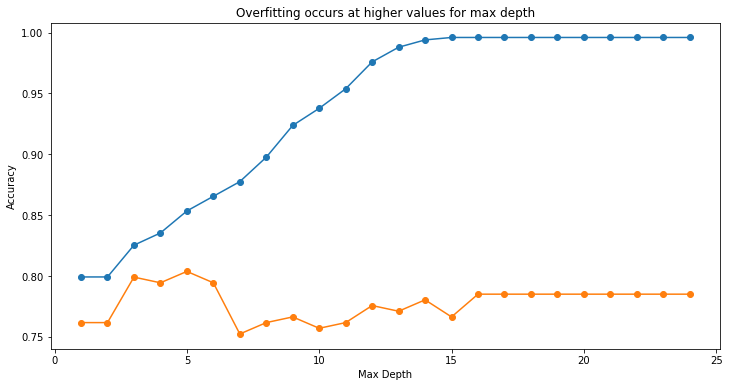

In [45]:
plt.figure(figsize = (12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting occurs at higher values for max depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [47]:
df[df.difference <= .10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False, True])

,max_depth,train_accuracy,validate_accuracy,difference
4,5,0.853414,0.803738,0.049675
2,3,0.825301,0.799065,0.026236
3,4,0.835341,0.794393,0.040949
5,6,0.865462,0.794393,0.071069
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
